In [552]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/train (3).csv',usecols=['Age','Fare','Survived'])


In [553]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [554]:
df.info()
df.isnull().mean()*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [555]:
x = df.drop(columns=['Survived'])
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [556]:
x_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [557]:
x_train['Age_imp'] = x_train['Age']
x_test['Age_imp'] = x_test['Age']

In [558]:
x_train

,Age,Fare,Age_imp
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [559]:
x_train['Age_imp'][x_train['Age_imp'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imp'][x_test['Age_imp'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipython-input-3139237128.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imp'][x_train['Age_imp'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
/tmp/ipython-input-3139237128.py:2: Futu

In [564]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([70.  , 27.  , 42.  , 22.  , 19.  ,  2.  , 38.  , 23.  , 25.  ,
       40.  , 24.  , 49.  , 21.  , 43.  , 30.  , 36.  , 45.  , 20.  ,
       24.  , 38.  , 51.  , 38.  , 32.  ,  4.  ,  9.  , 19.  , 52.  ,
       39.  , 71.  , 39.  , 49.  , 28.  , 31.  , 20.  , 14.  , 23.  ,
       31.  , 40.  , 24.  , 40.  , 36.  , 28.  , 50.  , 51.  , 65.  ,
       50.  , 33.  ,  4.  , 22.  , 36.  , 33.  , 45.  , 27.  ,  5.  ,
       47.  , 60.  , 34.  , 23.  , 36.5 , 40.  , 45.  , 19.  , 39.  ,
       34.  , 24.  , 21.  , 14.  , 17.  , 17.  , 44.  , 14.  , 16.  ,
       32.5 , 36.  , 30.  , 30.  ,  0.67, 41.  , 16.  , 22.  , 21.  ,
       30.  , 28.  , 62.  , 30.  , 65.  , 16.  , 25.  , 59.  , 46.  ,
       28.  , 39.  , 22.  , 32.  ,  2.  , 28.  , 31.  , 34.  , 27.  ,
        6.  , 36.  , 51.  , 17.  , 23.  , 39.  , 29.  , 18.  , 43.  ,
       42.  , 36.  ,  0.75, 29.  ,  5.  , 35.  , 24.  , 42.  , 21.  ,
       11.  ,  3.  , 28.  , 21.  , 45.5 , 32.  , 49.  , 21.  , 32.  ,
       52.  , 19.  ,

/tmp/ipython-input-2325648396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
/tmp/ipython-input-2325648396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imp'],label = 'Imputed',hist=False)


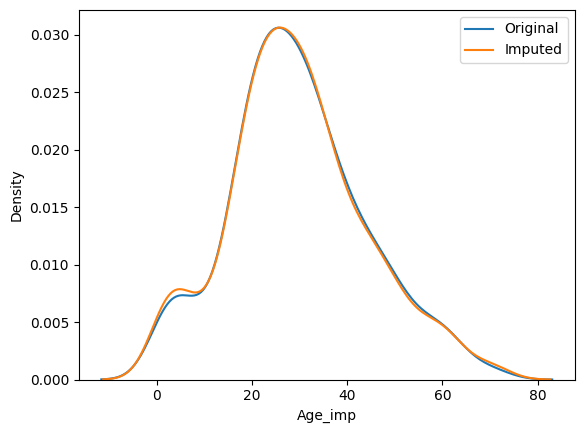

In [565]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imp'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [568]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imp'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  209.792535077988


<Axes: >

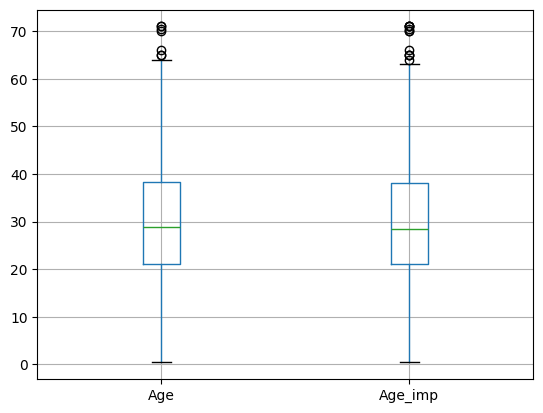

In [570]:
x_train[['Age', 'Age_imp']].boxplot()